<a href="https://colab.research.google.com/github/AnastacioMelo/Portifolio_Dados/blob/main/Empresas_Unicornios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Empresas Unicónios

*  Para a análise abaixo foi utilizado dados do "Unicorn Startups" disponibilizados no site www.kaggle.com.
*  Empresas unicórnios são startups avaliadas em mais de um
bilhão de dólares. O termo foi cunhado em 2013 por Aileen Lee, fundadora da Cowboy Ventures, para destacar a raridade dessas empresas. Normalmente, unicórnios são caracterizados por seu rápido crescimento, inovação tecnológica e potencial disruptivo em seus respectivos mercados. A ascensão dessas empresas geralmente é impulsionada por investimentos significativos de capital de risco, uma base de usuários em rápida expansão e a capacidade de escalar operações globalmente.



* Algumas perguntas a serem respondidas:


1.   Qual o serviço se destaca nos setores das Empresas Unicórnios?
2.   Quais são os paises que mais geram Empresas Unicórnios?
3.   Quais são os paises que mais geram receita com as Empresas Unicórnios?
4.   Dentre as Empresas Unicórnios, qual Ano foi gerado mais receita?



*   Fonte do Dataset:https://www.kaggle.com/datasets/ramjasmaurya/unicorn-startups.



In [1]:
#importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#importando Dataset
unicornio = pd.read_csv('/content/Startups+in+2021+end.csv')

In [3]:
#visualizando os dados
unicornio.head()

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [4]:
#verificando dimensão do Dataset
unicornio.shape

(936, 8)

In [5]:
#verificando quais são as colunas do Dataset
unicornio.columns

Index(['Unnamed: 0', 'Company', 'Valuation ($B)', 'Date Joined', 'Country',
       'City', 'Industry', 'Select Investors'],
      dtype='object')

In [6]:
#renomeando as colunas do Dataset
unicornio.rename(columns={
    'Unnamed: 0' : 'Id',
    'Company' : 'Empresa',
    'Valuation ($B)' : 'Valor($)',
    'Date Joined' : 'Data Adesão',
    'Country' : 'Pais',
    'City' : 'Cidade',
    'Industry' : 'Setor',
    'Select Investors' : 'Investidores'
    }, inplace=True)

In [7]:
#verificar o tipo de dado das colunas do Dataset
unicornio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            936 non-null    int64 
 1   Empresa       936 non-null    object
 2   Valor($)      936 non-null    object
 3   Data Adesão   936 non-null    object
 4   Pais          936 non-null    object
 5   Cidade        921 non-null    object
 6   Setor         936 non-null    object
 7   Investidores  935 non-null    object
dtypes: int64(1), object(7)
memory usage: 58.6+ KB


Com base na Analise feita acima, podemos visualizar que há duas colunas que estão o tipo de dado equivocado, coluna: Valor e Data.

In [8]:
#quais são os campos nulos do Dataset
unicornio.isnull().sum()

Id               0
Empresa          0
Valor($)         0
Data Adesão      0
Pais             0
Cidade          15
Setor            0
Investidores     1
dtype: int64

In [9]:
#campos unicos do Dataset
unicornio.nunique()

Id              936
Empresa         935
Valor($)        192
Data Adesão     589
Pais             47
Cidade          239
Setor            17
Investidores    920
dtype: int64

In [10]:
#rank de setor
unicornio['Setor'].value_counts()

Setor
Fintech                                190
Internet software & services           167
E-commerce & direct-to-consumer        102
Artificial intelligence                 69
Health                                  63
Supply chain, logistics, & delivery     51
Other                                   51
Cybersecurity                           41
Mobile & telecommunications             37
Data management & analytics             36
Hardware                                32
Auto & transportation                   29
Edtech                                  27
Consumer & retail                       23
Travel                                  13
Artificial Intelligence                  4
Finttech                                 1
Name: count, dtype: int64

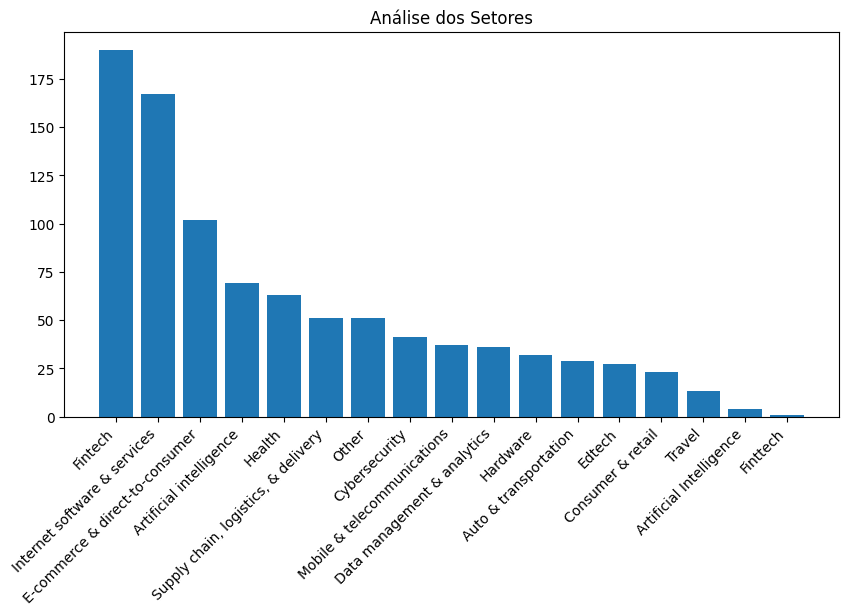

In [29]:
plt.figure(figsize=(10,5))
_ =plt.title('Análise dos Setores')
_ =plt.bar(unicornio['Setor'].value_counts().index, unicornio['Setor'].value_counts())
_ =plt.xticks(rotation=45, ha='right')

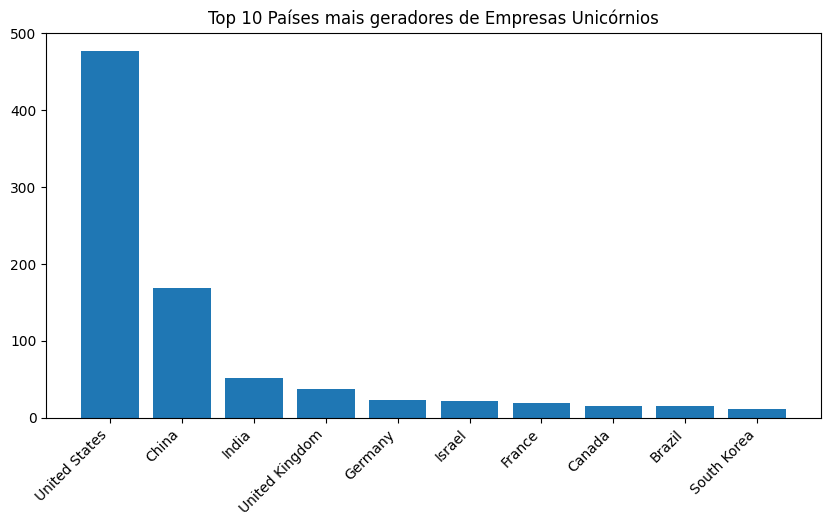

In [12]:
top10 = unicornio['Pais'].value_counts().head(10)

_ =plt.figure(figsize=(10,5))
_ =plt.title('Top 10 Países mais geradores de Empresas Unicórnios')
_ =plt.bar(top10.index, top10.values)
_ =plt.xticks(rotation=45, ha='right')

In [13]:
#conversão da coluna 'Data de Adesão' para Date
unicornio['Data Adesão'] = pd.to_datetime(unicornio['Data Adesão'])

In [14]:
#extrair o Ano e Mes
unicornio['Ano'] = pd.DatetimeIndex(unicornio['Data Adesão']).year
unicornio['Mes'] = pd.DatetimeIndex(unicornio['Data Adesão']).month

In [15]:
unicornio.head()

,Id,Empresa,Valor($),Data Adesão,Pais,Cidade,Setor,Investidores,Ano,Mes
0,0,Bytedance,$140,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2017,4
1,1,SpaceX,$100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012,12
2,2,Stripe,$95,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2014,1
3,3,Klarna,$45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",2011,12
4,4,Canva,$40,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",2018,1


In [16]:
#tirar o caractere string da coluna Valor($) e trocar por vazio
unicornio['Valor($)'] = unicornio['Valor($)'].str.replace('$','')

In [17]:
unicornio.head()

,Id,Empresa,Valor($),Data Adesão,Pais,Cidade,Setor,Investidores,Ano,Mes
0,0,Bytedance,140,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2017,4
1,1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012,12
2,2,Stripe,95,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2014,1
3,3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",2011,12
4,4,Canva,40,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",2018,1


In [18]:
#converter a coluna Valor para float64
unicornio['Valor($)'] = pd.to_numeric(unicornio['Valor($)'])

In [19]:
unicornio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Id            936 non-null    int64         
 1   Empresa       936 non-null    object        
 2   Valor($)      936 non-null    float64       
 3   Data Adesão   936 non-null    datetime64[ns]
 4   Pais          936 non-null    object        
 5   Cidade        921 non-null    object        
 6   Setor         936 non-null    object        
 7   Investidores  935 non-null    object        
 8   Ano           936 non-null    int32         
 9   Mes           936 non-null    int32         
dtypes: datetime64[ns](1), float64(1), int32(2), int64(1), object(5)
memory usage: 65.9+ KB


In [20]:
#agrupando a coluna Valor por pais
valor = unicornio.groupby('Pais')['Valor($)'].sum().sort_values(ascending=False)

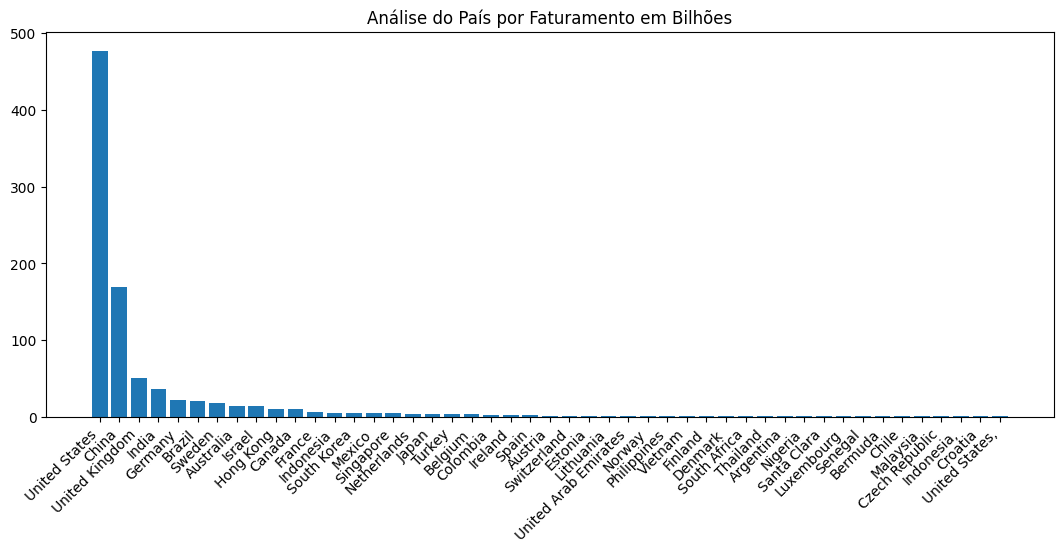

In [27]:
_ =plt.figure(figsize=(13,5))
_ =plt.title('Análise do País por Faturamento em Bilhões')
_ =plt.bar(valor.index, unicornio['Pais'].value_counts())
_ =plt.xticks(rotation=45, ha='right')

OBS: Não necessariamente os Países quem mais tiveram Empresas Unicórnios foram os Países que mais lucraram.

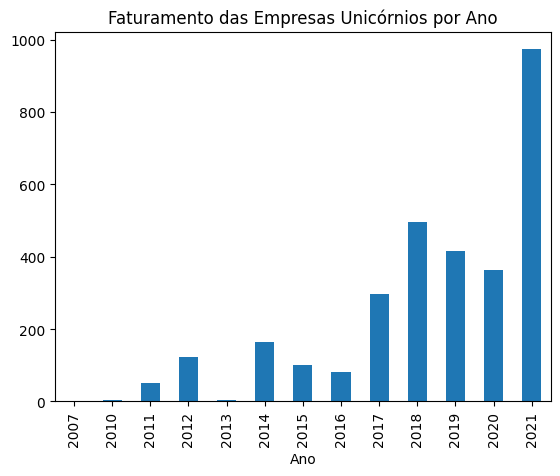

In [28]:
_ = unicornio.groupby('Ano')['Valor($)'].sum().plot(kind='bar')
_ = plt.title('Faturamento das Empresas Unicórnios por Ano')